# Python Statistics Essential Training

## Collecting and Cleaning Data

### 01_01 - Loading data

Using the Ames, Iowa Housing Data https://jse.amstat.org/v19n3/decock.pdf


Goals:

1. Load data from a CSV file using the `pd.read_csv` function.
2. Understand how to access and interpret the shape of a DataFrame.
3. Apply the `.describe` method to obtain summary statistics for a DataFrame.

##### The purpose of the `clean_housing` function applies several data cleaning steps, including converting string columns to 'category' type, replacing missing values in string columns, clipping values in the "Garage Yr Blt" column, and shrinking integer columns.

In [1]:
# 01_06
import numpy as np
import pandas as pd

# create a cell with the clean_housing and shrink_ints functions
# first create the shrink_ints functions
def shrink_ints(df):
    mapping = {}
    for col in df.dtypes[df.dtypes == 'int64[pyarrow]'].index:
        max_ = df[col].max()
        min_ = df[col].min()
        if min_ < 0:
            continue
        if max_ < 255:
            mapping[col] = 'uint8[pyarrow]'
        elif max_ < 65_535:
            mapping[col] = 'uint16[pyarrow]'
        elif max_ < 4294967295:
            mapping[col] = 'uint32[pyarrow]'
    return df.astype(mapping)

# now create the clean_housing function
def clean_housing(df):
    return (df
            .assign(**df.select_dtypes('string').replace('', 'Missing').astype('category'),
                    **{'Garage Yr Blt': df['Garage Yr Blt'].clip(upper=df['Year Built'].max())})
            .pipe(shrink_ints)
            )


# load raw data
url = 'data/ames-housing-dataset.zip'
rawDF = pd.read_csv(url, engine='pyarrow', dtype_backend='pyarrow')

# create a variable called housing that is the cleaned data
housing = clean_housing(rawDF)

### Challenge hint: To make my notebook(s) easier to use, make a chain that cleans up the code, stick it into a function, and then place it at the beginning of the notebook to initiate to avoid scrolling.

In [ ]:
import numpy as np
import pandas as pd
pd.__version__

In [2]:
import pandas as pd
url = 'https://github.com/mattharrison/datasets/raw/master/data/ames-housing-dataset.zip'
url = 'data/ames-housing-dataset.zip'
df = pd.read_csv(url, engine='pyarrow', dtype_backend='pyarrow')

In [ ]:
df.shape

In [ ]:
df.head()

In [3]:
# count means number of non-missing values
housing.describe()

,Order,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
count,2930.00000,2.930000e+03,2930.000000,2440.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2907.000000,...,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000
mean,1465.50000,7.144645e+08,57.387372,69.224590,10147.921843,6.094881,5.563140,1971.356314,1984.266553,101.896801,...,93.751877,47.533447,23.011604,2.592491,16.002048,2.243345,50.635154,6.216041,2007.790444,180796.060068
std,845.96247,1.887308e+08,42.638025,23.365335,7880.017759,1.411026,1.111537,30.245361,20.860286,179.112611,...,126.361562,67.483400,64.139059,25.141331,56.087370,35.597181,566.344288,2.714492,1.316613,79886.692357
min,1.00000,5.263011e+08,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,733.25000,5.284770e+08,20.000000,58.000000,7440.250000,5.000000,5.000000,1954.000000,1965.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129500.000000
50%,1465.50000,5.354536e+08,50.000000,68.000000,9436.500000,6.000000,5.000000,1973.000000,1993.000000,0.000000,...,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,160000.000000
75%,2197.75000,9.071811e+08,70.000000,80.000000,11555.250000,7.000000,6.000000,2001.000000,2004.000000,164.000000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,213500.000000
max,2930.00000,1.007100e+09,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,...,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


### 01_02 - Strings and Categories


Goals:

* Understand the data types of columns in a DataFrame using the `.dtypes` attribute.
* Select and filter categorical columns using the `.select_dtypes` method.
* Compute and interpret summary statistics for categorical columns using the `.describe` method.
* Determine the memory usage of string columns in a DataFrame.
* Convert string columns to the `'category'` data type to save memory.


In [6]:
df.dtypes

Order              int64[pyarrow]
PID                int64[pyarrow]
MS SubClass        int64[pyarrow]
MS Zoning         string[pyarrow]
Lot Frontage       int64[pyarrow]
                       ...       
Mo Sold            int64[pyarrow]
Yr Sold            int64[pyarrow]
Sale Type         string[pyarrow]
Sale Condition    string[pyarrow]
SalePrice          int64[pyarrow]
Length: 82, dtype: object

In [7]:
# Categoricals - Pandas 1.x
df.select_dtypes(object)

""
0
1
2
3
4
...
2925
2926
2927
2928


In [8]:
# Categoricals - Pandas 2
# selects only the strings columns
df.select_dtypes('string')  # or 'strings[pyarrow]'

,MS Zoning,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,...,Garage Type,Garage Finish,Garage Qual,Garage Cond,Paved Drive,Pool QC,Fence,Misc Feature,Sale Type,Sale Condition
0,RL,Pave,NA,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,...,Attchd,Fin,TA,TA,P,NA,NA,NA,WD,Normal
1,RH,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,...,Attchd,Unf,TA,TA,Y,NA,MnPrv,NA,WD,Normal
2,RL,Pave,NA,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,NA,NA,Gar2,WD,Normal
3,RL,Pave,NA,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,...,Attchd,Fin,TA,TA,Y,NA,NA,NA,WD,Normal
4,RL,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,Attchd,Fin,TA,TA,Y,NA,MnPrv,NA,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,RL,Pave,NA,IR1,Lvl,AllPub,CulDSac,Gtl,Mitchel,Norm,...,Detchd,Unf,TA,TA,Y,NA,GdPrv,NA,WD,Normal
2926,RL,Pave,NA,IR1,Low,AllPub,Inside,Mod,Mitchel,Norm,...,Attchd,Unf,TA,TA,Y,NA,MnPrv,NA,WD,Normal
2927,RL,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,...,NA,NA,NA,NA,Y,NA,MnPrv,Shed,WD,Normal
2928,RL,Pave,NA,Reg,Lvl,AllPub,Inside,Mod,Mitchel,Norm,...,Attchd,RFn,TA,TA,Y,NA,NA,NA,WD,Normal


In [ ]:
# Categoricals
# capital T is for transpose
# this dtype with string columns gives a summary statistics
# when uniqueness is low that means low cardinality. low cardinality is a good candidate for categoricals.
df.select_dtypes('string').describe().T

In [ ]:
# gives the number of bytes used by the string columns
(df
 .select_dtypes('string')
 .memory_usage(deep=True)
 .sum()
)

In [ ]:
# this saves memory by converting the string columns to categoricals
(df
 .select_dtypes('string')
 .astype('category')
 .memory_usage(deep=True)
 .sum()
)

In [ ]:
# almost 70% reduction in memory usage
957_287 / 139_033

In [ ]:
df.shape

In [ ]:
# Missing numeric columns (and strings in Pandas 1)
# the mean gives the fraction of missing values
# pipe is used to filter out the columns with missing values
# duplicate/repeated values can possibly mean those values are missing
(df
 .isna()
 .mean() 
 .mul(100)
 .pipe(lambda ser: ser[ser > 0])
)

In [ ]:
# Missing string values
# eq is used to check if the string is empty
(df
 .select_dtypes('string')
 .eq('')
 .mean() 
 .mul(100)
 .pipe(lambda ser: ser[ser > 0])
)

In [ ]:
# deleting (method 1)
# Notice Alley is NA!
# select any row where there is no missing value in the string columns
# the ~ is used to negate the condition
(df
 [~df.select_dtypes('string').eq('').any(axis='columns')]
)

In [ ]:
# (method 2)
(df
 .select_dtypes('string')
 .eq('')
 .any(axis='columns')
)


In [ ]:
# Looks like many values are NA
# Missing string values (Encoded as NA)
(df
 .select_dtypes('string')
 .eq('NA')
 .mean() 
 .mul(100)
 .pipe(lambda ser: ser[ser > 0])
)

In [ ]:
# Looks for columns with NA
(df
 .query('`Pool QC`.isna()')
)

In [ ]:
# Looks for columns with NA
(df
 .query('`Pool QC` == "NA"')
)

In [ ]:
# Fill in empty string with 'Not Applicable'
# assign is used to add a new column
# the ** is used to unpack the dictionary
# both the assign and ** to a dataframe updates the values of the dataframe
(df
 .assign(
     **df.select_dtypes('string').replace('', 'Not Applicable'))
)

In [ ]:
# Examining unique values
# Note the empty string, can look into why the string column is empty,
# for example, one of the values in the electrical column is empty, but why? 
# is it because the house did not have that type of electrical system?
(df
 .Electrical
 .value_counts()
)

In [ ]:
# Examine the row that is missing the electrical value
(df
 .query('Electrical == ""')
)

In [ ]:
# This one was encoded as NA
(df
 ['Fireplace Qu']
 .value_counts()
)

In [ ]:
(df
 ['Bsmt Cond']
 .value_counts()
)

In [ ]:
# Converting to Category
# takes the dataframe replaces the empty strings with 'Not Applicable' and 
# converts the string columns to categoricals
(df
 .assign(
     **df
     .select_dtypes('string')
     .replace('', 'Not Applicable')
     .astype('category')
 )
)

In [ ]:
# Converting to Category
# check the memory usage
(df
 .assign(
     **df
     .select_dtypes('string')
     .replace('', 'Not Applicable')
     .astype('category')
 )
 .memory_usage(deep=True)
 .sum()
)

In [ ]:
# Converting to Category
# compare the memory usage to the original dataframe
(df
 .assign(
     **df
     .select_dtypes('string')
     .replace('', 'Not Applicable')
     #.astype('category')
 )
 .memory_usage(deep=True)
 .sum()
)

### 01_03 - Cleaning Numbers

Goals:

* Select and filter numeric columns using the `.select_dtypes` method.
* Compute and interpret summary statistics for numeric columns using the `.describe` method.
* Identify missing values in numeric columns.
* Display a larger amount of data using options for minimum rows and maximum columns.
* Utilize the `style` attribute to enhance the display of DataFrames.

In [ ]:
# In Pandas 1.x there would be many numbers here
# In Pandas 1 it converted missing values into a float
(df
 .select_dtypes(float)
)

In [ ]:
(df
 .select_dtypes(int)
)

In [ ]:
# Summary statistics for integer columns
# count is the number of non-missing values
# min and max values show the range of values not including missing values
# mean is the average value not including missing values
# 25%, 50%, 75% are the quantiles. the 50% quantile is the median
# if the mean and the median are similar the data might be normally distributed
# if the mean is greater than the median the data might be right skewed
(df
 .select_dtypes(int)
 .describe()
)

In [35]:
df.shape

(2930, 82)

In [ ]:
# View the missing values of the integer columns
# the `` is used to escape the space in the column name because its values 
# aren't standard python attributes
(df
 .query('`Lot Frontage`.isna()')
)

In [ ]:
# How to see more data with context manager
# context manager allows you to enter the indented context and then exit the 
# context when not indented
with pd.option_context('display.min_rows', 30, 'display.max_columns', 82):
    display(df
     .query('`Lot Frontage`.isna()')
    )

In [ ]:
# Use the ? to see the documentation
df.style.set_sticky?

In [ ]:
# Because using the sticky the columns and index are sticky
with pd.option_context('display.min_rows', 30, 'display.max_columns', 82):
    display(df
     .query('`Lot Frontage`.isna()')
     .style
     .set_sticky(axis='columns') # broken 
     .set_sticky(axis='index')
    )    

In [ ]:
# Examine a column with missing values
# might be problematic when running linear regression because it doesn't like missing values
(df
 .query('`Garage Yr Blt`.isna()')
 )

In [ ]:
# missing + 2207!!!?
(df
 ['Garage Yr Blt']
 .describe()
)

In [ ]:
# probably a typo in the Garage Yr Built!!
with pd.option_context('display.min_rows', 30, 'display.max_columns', 82):  
    display(df.query('`Garage Yr Blt` > 2200'))

In [ ]:
# Any columns with Yr
df.filter?

In [ ]:
(df
 .filter(like='Yr')
)

In [ ]:
# Any columns with Yr > 2023
# pipe is used to filter out the rows where the values are greater than 2023
(df
 .filter(like='Yr')
 .pipe(lambda df_: df_[df_.gt(2023).any(axis='columns')])
)

In [ ]:
# What about "Year" columns?
# Rename columns and filter for other typos
(df
 .rename(columns=lambda name: name.replace('Yr', 'Year'))
 .filter(like='Year')
 .pipe(lambda df_: df_[df_.gt(2023).any(axis='columns')])
)

In [ ]:
(df
 ['Garage Yr Blt']
 .clip(upper=df['Year Built'].max())
 .value_counts()
 .sort_index()
)

In [ ]:
# Update categories and clip
# Inspect types
# using a dictionary unpacking to update the dataframe
# because there are spaces in the column name, Garage Year Built.
(df
 .assign(**df.select_dtypes('string').replace('', 'Missing').astype('category'),
         **{'Garage Yr Blt': df['Garage Yr Blt'].clip(upper=df['Year Built'].max())})
 .dtypes.value_counts()
)

### 01_04 - Shrinking Numbers

Goals:

* Create a function, `shrink_ints`, to automatically convert suitable integer columns to smaller integer types (`uint8`, `uint16`, `uint32`) based on their range of values.
* Apply the `shrink_ints` function to the DataFrame to reduce memory usage while maintaining data integrity.
* Create a function, `clean_housing`, that combines the data cleaning steps for string columns, clipping values in the "Garage Yr Blt" column, and shrinking integer columns.


In [ ]:
# continuing where we left off
# currently uses a 64bit memory usage
(df
 .assign(**df.select_dtypes('string').replace('', 'Missing').astype('category'),
         **{'Garage Yr Blt': df['Garage Yr Blt'].clip(upper=df['Year Built'].max())})
 .describe()
)

In [ ]:
# View the different bit memory usage
# works with pyarrow dataframes
for size in [np.uint8, np.uint16, np.uint32]:
    print(np.iinfo(size))

In [ ]:
# min and max values for the different bit sizes
# min deals with unsigned integers and max deals with signed integers
def shrink_ints(df):
    mapping = {}
    for col in df.dtypes[df.dtypes=='int64[pyarrow]'].index:
        max_ = df[col].max()
        min_ = df[col].min()
        if min_ < 0:
            continue
        if max_ < 255:
            mapping[col] = 'uint8[pyarrow]'
        elif max_ < 65_535:
            mapping[col] = 'uint16[pyarrow]'
        elif max_ <  4294967295:
            mapping[col] = 'uint32[pyarrow]'
    return df.astype(mapping)
            
(df
 .assign(**df.select_dtypes('string').replace('', 'Missing').astype('category'),
         **{'Garage Yr Blt': df['Garage Yr Blt'].clip(upper=df['Year Built'].max())})
 .pipe(shrink_ints)
 .describe()
)

In [ ]:
# View how much memory is used
(df
 .assign(**df.select_dtypes('string').replace('', 'Missing').astype('category'),
         **{'Garage Yr Blt': df['Garage Yr Blt'].clip(upper=df['Year Built'].max())})
 .pipe(shrink_ints)
 .memory_usage(deep=True)
 .sum()
)

In [ ]:
(df
 .memory_usage(deep=True)
 .sum()
)

In [ ]:
1_875_484 / 361_446

In [ ]:
# make function
def shrink_ints(df):
    mapping = {}
    for col in df.dtypes[df.dtypes=='int64[pyarrow]'].index:
        max_ = df[col].max()
        min_ = df[col].min()
        if min_ < 0:
            continue
        if max_ < 255:
            mapping[col] = 'uint8[pyarrow]'
        elif max_ < 65_535:
            mapping[col] = 'uint16[pyarrow]'
        elif max_ <  4294967295:
            mapping[col] = 'uint32[pyarrow]'
    return df.astype(mapping)


def clean_housing(df):
    return (df
     .assign(**df.select_dtypes('string').replace('', 'Missing').astype('category'),
             **{'Garage Yr Blt': df['Garage Yr Blt'].clip(upper=df['Year Built'].max())})
     .pipe(shrink_ints)
    )    

clean_housing(df).dtypes

### 01_05 - Challenge: Clean Ames 

* Create a cell containing all the imports for this notebook
* Create a cell with the `clean_housing` and `shrink_ints` functions
* Add code to load the raw data and create a `housing` variable from calling `clean_housing`
* Move those cells to the top of the notebook
* Restart the notebook and make sure that those cells work

In [ ]:
# 01_06
# import numpy as np
# import pandas as pd

# create a cell with the clean_housing and shrink_ints functions
# first create the shrink_ints functions


# def shrink_ints(df):
#     mapping = {}
#     for col in df.dtypes[df.dtypes == 'int64[pyarrow]'].index:
#         max_ = df[col].max()
#         min_ = df[col].min()
#         if min_ < 0:
#             continue
#         if max_ < 255:
#             mapping[col] = 'unit8[pyarrow]'
#         elif max_ < 65_535:
#             mapping[col] = 'unit16[pyarrow]'
#         elif max_ < 4294967295:
#             mapping[col] = 'unit32[pyarrow]'
#     return df.astype(mapping)

# now create the clean_housing function


# def clean_housing(df):
#     return (df
#             .assign(**df.select_dtypes('string').replace('', 'Missing').astype('category'),
#                     **{'Garage Yr Built': df['Garage Yr Built'].clip(upper=df['Year Built'].max())})
#             .pipe(shrink_ints)
#             )


# load raw data
# url = 'data/ames-housing-dataset.zip'
# raw_df = pd.read_csv(url, engine='pyarrow', dtype_backend='pyarrow')

# create a variable called housing that is the cleaned data
# housing = clean_housing(raw_df)

## Exploring & Visualizing

### 02_01 - Categorical Exploration

Goals:

* Explore a categorical column, such as "MS Zoning," by accessing the column and displaying its unique values.
* Visualize the value counts of a categorical column using a bar chart.
* Visualize the value counts of a categorical column using a horizontal bar chart.

In [1]:
import pandas as pd
url = 'data/ames-housing-dataset.zip'
raw = pd.read_csv(url, engine='pyarrow', dtype_backend='pyarrow')

# make function
def shrink_ints(df):
    mapping = {}
    for col in df.dtypes[df.dtypes=='int64[pyarrow]'].index:
        max_ = df[col].max()
        min_ = df[col].min()
        if min_ < 0:
            continue
        if max_ < 255:
            mapping[col] = 'uint8[pyarrow]'
        elif max_ < 65_535:
            mapping[col] = 'uint16[pyarrow]'
        elif max_ <  4294967295:
            mapping[col] = 'uint32[pyarrow]'
    return df.astype(mapping)


def clean_housing(df):
    return (df
     .assign(**df.select_dtypes('string').replace('', 'Missing').astype('category'),
             **{'Garage Yr Blt': df['Garage Yr Blt'].clip(upper=df['Year Built'].max())})
     .pipe(shrink_ints)
    )    

housing = clean_housing(raw)

In [5]:
housing.describe()

,Order,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
count,2930.00000,2.930000e+03,2930.000000,2440.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2907.000000,...,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000
mean,1465.50000,7.144645e+08,57.387372,69.224590,10147.921843,6.094881,5.563140,1971.356314,1984.266553,101.896801,...,93.751877,47.533447,23.011604,2.592491,16.002048,2.243345,50.635154,6.216041,2007.790444,180796.060068
std,845.96247,1.887308e+08,42.638025,23.365335,7880.017759,1.411026,1.111537,30.245361,20.860286,179.112611,...,126.361562,67.483400,64.139059,25.141331,56.087370,35.597181,566.344288,2.714492,1.316613,79886.692357
min,1.00000,5.263011e+08,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,733.25000,5.284770e+08,20.000000,58.000000,7440.250000,5.000000,5.000000,1954.000000,1965.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129500.000000
50%,1465.50000,5.354536e+08,50.000000,68.000000,9436.500000,6.000000,5.000000,1973.000000,1993.000000,0.000000,...,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,160000.000000
75%,2197.75000,9.071811e+08,70.000000,80.000000,11555.250000,7.000000,6.000000,2001.000000,2004.000000,164.000000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,213500.000000
max,2930.00000,1.007100e+09,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,...,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


In [6]:
# categoricals
(housing
  ['MS Zoning'])

0       RL
1       RH
2       RL
3       RL
4       RL
        ..
2925    RL
2926    RL
2927    RL
2928    RL
2929    RL
Name: MS Zoning, Length: 2930, dtype: category
Categories (7, string[pyarrow]): [A (agr), C (all), FV, I (all), RH, RL, RM]

In [7]:
# categoricals
# this gives a series of the unique values in the column
(housing
  ['MS Zoning']
  .value_counts())

MS Zoning
RL         2273
RM          462
FV          139
RH           27
C (all)      25
A (agr)       2
I (all)       2
Name: count, dtype: int64

<Axes: xlabel='MS Zoning'>

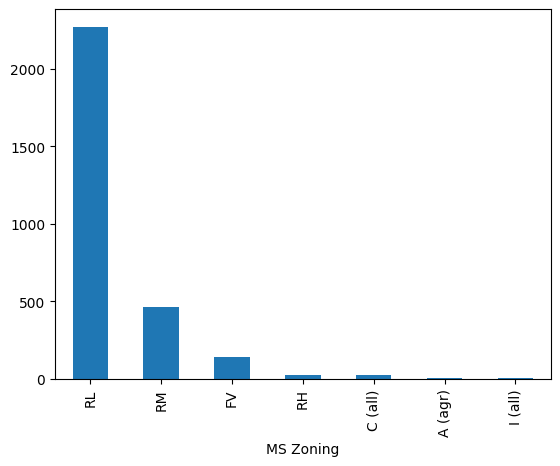

In [8]:
# categoricals
# visualizing the unique values in the column
(housing
  ['MS Zoning']
  .value_counts()
  .plot.bar())

<Axes: ylabel='MS Zoning'>

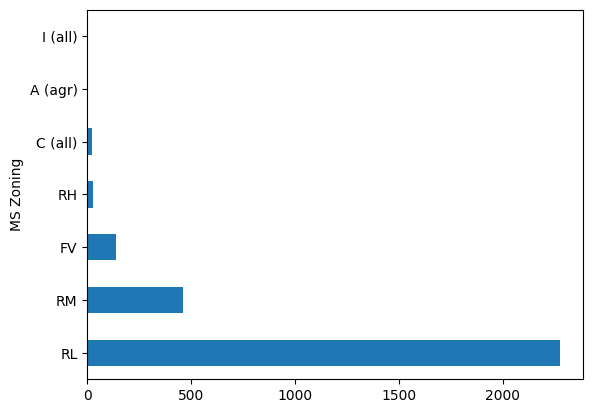

In [9]:
# categoricals
# change the bar plot to a horizontal bar plot
(housing
  ['MS Zoning']
  .value_counts()
  .plot.barh())

### 02_02: Histograms and Distributions

Goals:

* Obtain descriptive statistics of the "SalePrice" column using the `.describe` method.
* Visualize the distribution of the "SalePrice" column using a histogram.
* Customize the histogram by specifying the number of bins using the `bins` parameter.

In [10]:
# Numerical
# get a numerical statistical summary of the Sale Price column
(housing
 .SalePrice
 .describe()
)

count      2930.000000
mean     180796.060068
std       79886.692357
min       12789.000000
25%      129500.000000
50%      160000.000000
75%      213500.000000
max      755000.000000
Name: SalePrice, dtype: double[pyarrow]

<Axes: >

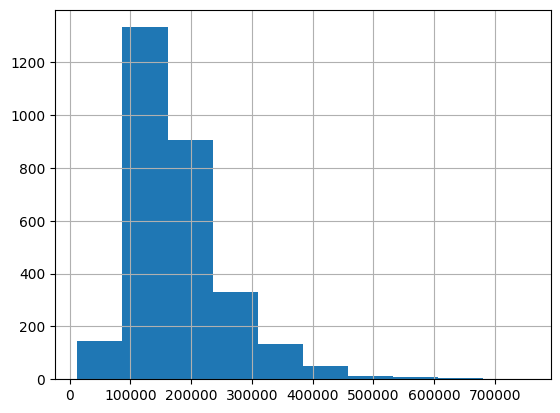

In [11]:
# Numerical
# visualize the Sale Price column with a histogram
(housing
 .SalePrice
 .hist()
)

<Axes: >

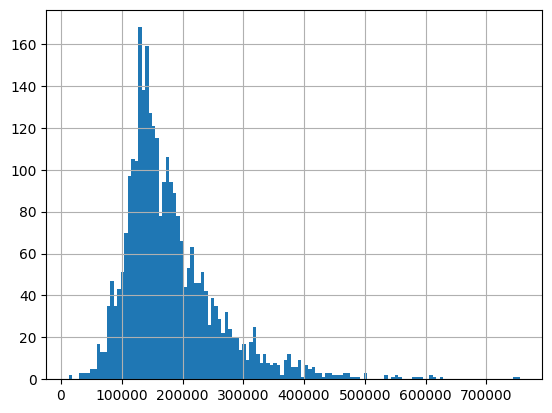

In [12]:
# Numerical
# set the bins to 130 to get a more detailed histogram
# 130 shows a finer granularity of the data
(housing
 .SalePrice
 .hist(bins=130)
)

### 02_03 - Outliers and Z-scores

Goals:

* Calculate the Z-score for the "SalePrice" column using the `calc_z` function.
* Identify outliers based on the Z-score by assigning a boolean column indicating whether the Z-score is greater than or equal to 3 or less than or equal to -3.
* Identify outliers using the IQR (interquartile range) method by assigning a boolean column indicating whether the values are outside the range of median ± 3 * IQR.


In [13]:
# outlier with Z-score
# returning the (col - mean)/std gives the z-score
# z-score is a measure of how many standard deviations a data point is from the mean
def calc_z(df, col):
    mean = df[col].mean() 
    std = df[col].std()
    return (df[col]-mean)/std

(housing
 .pipe(calc_z, col='SalePrice')
)

0       0.428156
1      -0.948795
2      -0.110107
3       0.791170
4       0.113961
          ...   
2925   -0.479380
2926   -0.623334
2927   -0.610816
2928   -0.135142
2929    0.090177
Name: SalePrice, Length: 2930, dtype: double[pyarrow]

In [16]:
# .assign is used to add a new column to the dataframe
# then query the new col z_score to find the absolute values 
# greater than or equal to 3 and less than or equal to -3

# (housing
#  .assign(z_score=calc_z(housing, col='SalePrice'))
#  .query('z_score.abs() >= 3')
# )

(housing
 .assign(z_score=calc_z(housing, col='SalePrice'))
 .query('z_score <= -3')
 )

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice,z_score


In [17]:
# create a function to calculate the extreme outliers with the iterquartile range
def calc_iqr_outlier(df, col):
    ser = df[col]
    iqr = ser.quantile(.75) - ser.quantile(.25)
    med = ser.median()
    small_mask = ser < med-iqr*3 # gives boolean values
    large_mask = ser > med+iqr*3 # gives boolean values
    return small_mask | large_mask

housing[
calc_iqr_outlier(housing, 'SalePrice')
]

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
15,16,527216070,60,RL,47,53504,Pave,NA,IR2,HLS,...,0,NA,NA,NA,0,6,2010,WD,Normal,538000
44,45,528150070,20,RL,100,12919,Pave,NA,IR1,Lvl,...,0,NA,NA,NA,0,3,2010,New,Partial,611657
46,47,528176010,20,RL,110,14300,Pave,NA,Reg,HLS,...,0,NA,NA,NA,0,6,2010,WD,Normal,500000
366,367,527214050,20,RL,63,17423,Pave,NA,IR1,Lvl,...,0,NA,NA,NA,0,7,2009,New,Partial,501837
421,422,528102140,60,RL,110,14257,Pave,NA,Reg,Lvl,...,0,NA,NA,NA,0,6,2009,WD,Normal,462000
422,423,528104070,60,RL,104,13518,Pave,NA,Reg,Lvl,...,0,NA,NA,NA,0,7,2009,New,Partial,485000
423,424,528106020,20,RL,105,15431,Pave,NA,Reg,Lvl,...,0,NA,NA,NA,0,4,2009,WD,Normal,555000
431,432,528110010,60,RL,97,13478,Pave,NA,IR1,Lvl,...,0,NA,NA,NA,0,6,2009,ConLI,Normal,451950
432,433,528110020,20,RL,105,13693,Pave,NA,Reg,Lvl,...,0,NA,NA,NA,0,3,2009,WD,Normal,610000
433,434,528110090,60,RL,107,13891,Pave,NA,Reg,Lvl,...,0,NA,NA,NA,0,1,2009,New,Partial,582933


In [18]:
def calc_iqr_outlier(df, col):
    ser = df[col]
    iqr = ser.quantile(.75) - ser.quantile(.25)
    med = ser.median()
    small_mask = ser < med-iqr*3
    large_mask = ser > med+iqr*3
    return small_mask | large_mask

(housing
 .assign(iqr_outlier=calc_iqr_outlier(housing, col='SalePrice'))
 .query('iqr_outlier')
)

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice,iqr_outlier
15,16,527216070,60,RL,47,53504,Pave,NA,IR2,HLS,...,NA,NA,NA,0,6,2010,WD,Normal,538000,True
44,45,528150070,20,RL,100,12919,Pave,NA,IR1,Lvl,...,NA,NA,NA,0,3,2010,New,Partial,611657,True
46,47,528176010,20,RL,110,14300,Pave,NA,Reg,HLS,...,NA,NA,NA,0,6,2010,WD,Normal,500000,True
366,367,527214050,20,RL,63,17423,Pave,NA,IR1,Lvl,...,NA,NA,NA,0,7,2009,New,Partial,501837,True
421,422,528102140,60,RL,110,14257,Pave,NA,Reg,Lvl,...,NA,NA,NA,0,6,2009,WD,Normal,462000,True
422,423,528104070,60,RL,104,13518,Pave,NA,Reg,Lvl,...,NA,NA,NA,0,7,2009,New,Partial,485000,True
423,424,528106020,20,RL,105,15431,Pave,NA,Reg,Lvl,...,NA,NA,NA,0,4,2009,WD,Normal,555000,True
431,432,528110010,60,RL,97,13478,Pave,NA,IR1,Lvl,...,NA,NA,NA,0,6,2009,ConLI,Normal,451950,True
432,433,528110020,20,RL,105,13693,Pave,NA,Reg,Lvl,...,NA,NA,NA,0,3,2009,WD,Normal,610000,True
433,434,528110090,60,RL,107,13891,Pave,NA,Reg,Lvl,...,NA,NA,NA,0,1,2009,New,Partial,582933,True


### 02_04 - Correlations

Goals:

* Calculate the Pearson correlation
* Calculate the Spearman correlation 
* Color a correlation matrix appropriately

In [ ]:
# Pearson correlation
# housing.corr()

In [2]:
# Pearson correlation, the closer the value is to 1 the stronger the positive 
# correlation, meaning as one value goes up the other value goes up.
# the closer the value is to -1 the stronger the negative correlation, meaning
# as one value goes up the other value goes down.
# If the value is close to 0 there is no correlation between the two values, 
# meaning as one value goes up or down the other value doesn't change.
housing.corr(numeric_only=True)

,Order,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
Order,1.000000,0.173593,0.011797,-0.007034,0.031354,-0.048500,-0.011054,-0.052319,-0.075566,-0.030907,...,-0.011292,0.016355,0.027908,-0.024975,0.004307,0.052518,-0.006083,0.133365,-0.975993,-0.031408
PID,0.173593,1.000000,-0.001281,-0.096918,0.034868,-0.263147,0.104451,-0.343388,-0.157111,-0.229283,...,-0.051135,-0.071311,0.162519,-0.024894,-0.025735,-0.002845,-0.008260,-0.050455,0.009579,-0.246521
MS SubClass,0.011797,-0.001281,1.000000,-0.420135,-0.204613,0.039419,-0.067349,0.036579,0.043397,0.002730,...,-0.017310,-0.014823,-0.022866,-0.037956,-0.050614,-0.003434,-0.029254,0.000350,-0.017905,-0.085092
Lot Frontage,-0.007034,-0.096918,-0.420135,1.000000,0.491313,0.212042,-0.074448,0.121562,0.091712,0.222407,...,0.120084,0.163040,0.012758,0.028564,0.076666,0.173947,0.044476,0.011085,-0.007547,0.357318
Lot Area,0.031354,0.034868,-0.204613,0.491313,1.000000,0.097188,-0.034759,0.023258,0.021682,0.126830,...,0.157212,0.103760,0.021868,0.016243,0.055044,0.093775,0.069188,0.003859,-0.023085,0.266549
Overall Qual,-0.048500,-0.263147,0.039419,0.212042,0.097188,1.000000,-0.094812,0.597027,0.569609,0.429418,...,0.255663,0.298412,-0.140332,0.018240,0.041615,0.030399,0.005179,0.031103,-0.020719,0.799262
Overall Cond,-0.011054,0.104451,-0.067349,-0.074448,-0.034759,-0.094812,1.000000,-0.368773,0.047680,-0.135340,...,0.020344,-0.068934,0.071459,0.043852,0.044055,-0.016787,0.034056,-0.007295,0.031207,-0.101697
Year Built,-0.052319,-0.343388,0.036579,0.121562,0.023258,0.597027,-0.368773,1.000000,0.612095,0.313292,...,0.228964,0.198365,-0.374364,0.015803,-0.041436,0.002213,-0.011011,0.014577,-0.013197,0.558426
Year Remod/Add,-0.075566,-0.157111,0.043397,0.091712,0.021682,0.569609,0.047680,0.612095,1.000000,0.196928,...,0.217857,0.241748,-0.220383,0.037412,-0.046888,-0.011410,-0.003132,0.018048,0.032652,0.532974
Mas Vnr Area,-0.030907,-0.229283,0.002730,0.222407,0.126830,0.429418,-0.135340,0.313292,0.196928,1.000000,...,0.165467,0.143748,-0.110787,0.013778,0.065643,0.004617,0.044934,-0.000276,-0.017715,0.508285


In [3]:
# Visualize the correlation
# coloring is good for positive but not the negative correlation
(housing
 .corr(method='spearman', numeric_only=True)
 .style
 .background_gradient()
)

,Order,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
Order,1.000000,0.205863,0.015074,-0.024209,0.012684,-0.049175,-0.015534,-0.056978,-0.084144,-0.041604,-0.034229,-0.018105,0.007011,-0.023661,-0.007155,-0.003142,0.026532,-0.023809,-0.041665,0.019375,-0.048754,-0.036492,0.014230,-0.015031,0.001629,-0.022008,-0.056214,-0.037003,-0.034251,-0.025811,0.000760,0.025225,-0.015117,0.006032,0.047986,-0.038106,0.142150,-0.977264,-0.035703
PID,0.205863,1.000000,-0.026875,-0.096820,-0.040342,-0.314353,0.111922,-0.314979,-0.208414,-0.237169,-0.050349,0.012860,-0.131413,-0.188111,-0.130427,-0.069092,0.047204,-0.165111,-0.009074,0.035377,-0.235566,-0.186542,-0.014036,0.084954,-0.130301,-0.151539,-0.274244,-0.276663,-0.207054,-0.092368,-0.176972,0.152769,0.005809,0.006353,0.003222,0.018754,-0.051290,0.003198,-0.270660
MS SubClass,0.015074,-0.026875,1.000000,-0.363408,-0.320550,0.103475,-0.065550,0.035632,0.015590,-0.009247,-0.098222,-0.093004,-0.113501,-0.300856,-0.278139,0.478281,0.059254,0.186612,-0.040172,0.004709,0.198671,0.266447,0.056779,0.269444,0.137183,0.010696,0.084326,0.020071,-0.047607,0.019062,0.030639,-0.005318,-0.033196,-0.039486,-0.001964,-0.031959,0.014999,-0.021873,0.001973
Lot Frontage,-0.024209,-0.096820,-0.363408,1.000000,0.659412,0.223162,-0.104785,0.192888,0.134932,0.275334,0.156582,0.044513,0.092700,0.375535,0.442289,0.000692,-0.042646,0.361933,0.103704,-0.029865,0.209843,0.077310,0.288409,0.010360,0.362169,0.248728,0.126930,0.348630,0.375849,0.118401,0.173802,-0.092787,0.010447,0.086195,0.083211,0.037856,0.013041,0.003559,0.397980
Lot Area,0.012684,-0.040342,-0.320550,0.659412,1.000000,0.196855,-0.079006,0.121151,0.103266,0.205822,0.171376,0.057461,0.068211,0.352739,0.439129,0.064565,-0.016875,0.418321,0.106726,0.009234,0.224679,0.128025,0.298550,-0.025662,0.383795,0.311907,0.073599,0.344115,0.370980,0.177609,0.171777,-0.042467,0.029028,0.091527,0.083071,0.073861,0.004774,-0.021720,0.429249
Overall Qual,-0.049175,-0.314353,0.103475,0.223162,0.196855,1.000000,-0.189638,0.664590,0.579323,0.423202,0.179239,-0.091898,0.239273,0.472852,0.415988,0.237677,-0.050242,0.577780,0.148886,-0.047082,0.556720,0.294043,0.077886,-0.170318,0.378023,0.419263,0.638165,0.611424,0.547140,0.290231,0.440433,-0.192093,0.019398,0.026212,0.033057,-0.076443,0.029163,-0.017015,0.808800
Overall Cond,-0.015534,0.111922,-0.065550,-0.104785,-0.079006,-0.189638,1.000000,-0.422306,-0.075119,-0.181996,-0.020644,0.095954,-0.123413,-0.223382,-0.187027,-0.012957,0.018427,-0.189100,-0.045087,0.089080,-0.282743,-0.106949,-0.012151,-0.084478,-0.126437,-0.056648,-0.395204,-0.258175,-0.216048,-0.036363,-0.175446,0.134745,0.044303,0.050333,-0.020386,0.061434,-0.006480,0.039612,-0.165657
Year Built,-0.056978,-0.314979,0.035632,0.192888,0.121151,0.664590,-0.422306,1.000000,0.707678,0.398747,0.214515,-0.095639,0.124441,0.442113,0.324522,0.022695,-0.123324,0.317367,0.187555,-0.054695,0.536116,0.265468,-0.032275,-0.129373,0.181709,0.199048,0.900386,0.600675,0.533612,0.296569,0.402890,-0.434250,0.011180,-0.066507,0.004203,-0.079103,0.016111,-0.009527,0.680822
Year Remod/Add,-0.084144,-0.208414,0.015590,0.134932,0.103266,0.579323,-0.075119,0.707678,1.000000,0.249285,0.087763,-0.116761,0.167045,0.309842,0.250180,0.090110,-0.058727,0.318917,0.120280,-0.057018,0.455856,0.179883,-0.032359,-0.144737,0.207894,0.148938,0.742208,0.460615,0.409481,0.249966,0.372293,-0.268871,0.049288,-0.058677,-0.011139,-0.057701,0.014296,0.041084,0.601454
Mas Vnr Area,-0.041604,-0.237169,-0.009247,0.275334,0.205822,0.423202,-0.181996,0.398747,0.249285,1.000000,0.270651,-0.028671,0.055245,

In [4]:
# Coloring is better to show the negative correlation
(housing
 .corr(method='spearman', numeric_only=True)
 .style
 .background_gradient(cmap='RdBu')
)

,Order,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
Order,1.000000,0.205863,0.015074,-0.024209,0.012684,-0.049175,-0.015534,-0.056978,-0.084144,-0.041604,-0.034229,-0.018105,0.007011,-0.023661,-0.007155,-0.003142,0.026532,-0.023809,-0.041665,0.019375,-0.048754,-0.036492,0.014230,-0.015031,0.001629,-0.022008,-0.056214,-0.037003,-0.034251,-0.025811,0.000760,0.025225,-0.015117,0.006032,0.047986,-0.038106,0.142150,-0.977264,-0.035703
PID,0.205863,1.000000,-0.026875,-0.096820,-0.040342,-0.314353,0.111922,-0.314979,-0.208414,-0.237169,-0.050349,0.012860,-0.131413,-0.188111,-0.130427,-0.069092,0.047204,-0.165111,-0.009074,0.035377,-0.235566,-0.186542,-0.014036,0.084954,-0.130301,-0.151539,-0.274244,-0.276663,-0.207054,-0.092368,-0.176972,0.152769,0.005809,0.006353,0.003222,0.018754,-0.051290,0.003198,-0.270660
MS SubClass,0.015074,-0.026875,1.000000,-0.363408,-0.320550,0.103475,-0.065550,0.035632,0.015590,-0.009247,-0.098222,-0.093004,-0.113501,-0.300856,-0.278139,0.478281,0.059254,0.186612,-0.040172,0.004709,0.198671,0.266447,0.056779,0.269444,0.137183,0.010696,0.084326,0.020071,-0.047607,0.019062,0.030639,-0.005318,-0.033196,-0.039486,-0.001964,-0.031959,0.014999,-0.021873,0.001973
Lot Frontage,-0.024209,-0.096820,-0.363408,1.000000,0.659412,0.223162,-0.104785,0.192888,0.134932,0.275334,0.156582,0.044513,0.092700,0.375535,0.442289,0.000692,-0.042646,0.361933,0.103704,-0.029865,0.209843,0.077310,0.288409,0.010360,0.362169,0.248728,0.126930,0.348630,0.375849,0.118401,0.173802,-0.092787,0.010447,0.086195,0.083211,0.037856,0.013041,0.003559,0.397980
Lot Area,0.012684,-0.040342,-0.320550,0.659412,1.000000,0.196855,-0.079006,0.121151,0.103266,0.205822,0.171376,0.057461,0.068211,0.352739,0.439129,0.064565,-0.016875,0.418321,0.106726,0.009234,0.224679,0.128025,0.298550,-0.025662,0.383795,0.311907,0.073599,0.344115,0.370980,0.177609,0.171777,-0.042467,0.029028,0.091527,0.083071,0.073861,0.004774,-0.021720,0.429249
Overall Qual,-0.049175,-0.314353,0.103475,0.223162,0.196855,1.000000,-0.189638,0.664590,0.579323,0.423202,0.179239,-0.091898,0.239273,0.472852,0.415988,0.237677,-0.050242,0.577780,0.148886,-0.047082,0.556720,0.294043,0.077886,-0.170318,0.378023,0.419263,0.638165,0.611424,0.547140,0.290231,0.440433,-0.192093,0.019398,0.026212,0.033057,-0.076443,0.029163,-0.017015,0.808800
Overall Cond,-0.015534,0.111922,-0.065550,-0.104785,-0.079006,-0.189638,1.000000,-0.422306,-0.075119,-0.181996,-0.020644,0.095954,-0.123413,-0.223382,-0.187027,-0.012957,0.018427,-0.189100,-0.045087,0.089080,-0.282743,-0.106949,-0.012151,-0.084478,-0.126437,-0.056648,-0.395204,-0.258175,-0.216048,-0.036363,-0.175446,0.134745,0.044303,0.050333,-0.020386,0.061434,-0.006480,0.039612,-0.165657
Year Built,-0.056978,-0.314979,0.035632,0.192888,0.121151,0.664590,-0.422306,1.000000,0.707678,0.398747,0.214515,-0.095639,0.124441,0.442113,0.324522,0.022695,-0.123324,0.317367,0.187555,-0.054695,0.536116,0.265468,-0.032275,-0.129373,0.181709,0.199048,0.900386,0.600675,0.533612,0.296569,0.402890,-0.434250,0.011180,-0.066507,0.004203,-0.079103,0.016111,-0.009527,0.680822
Year Remod/Add,-0.084144,-0.208414,0.015590,0.134932,0.103266,0.579323,-0.075119,0.707678,1.000000,0.249285,0.087763,-0.116761,0.167045,0.309842,0.250180,0.090110,-0.058727,0.318917,0.120280,-0.057018,0.455856,0.179883,-0.032359,-0.144737,0.207894,0.148938,0.742208,0.460615,0.409481,0.249966,0.372293,-0.268871,0.049288,-0.058677,-0.011139,-0.057701,0.014296,0.041084,0.601454
Mas Vnr Area,-0.041604,-0.237169,-0.009247,0.275334,0.205822,0.423202,-0.181996,0.398747,0.249285,1.000000,0.270651,-0.028671,0.055245,

In [5]:
# Pin the negative values to -1 and the positive values to 1
# the more red the stronger the negative correlation
(housing
 .corr(method='spearman', numeric_only=True)
 .style
 .background_gradient(cmap='RdBu', vmin=-1, vmax=1)
)

,Order,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
Order,1.000000,0.205863,0.015074,-0.024209,0.012684,-0.049175,-0.015534,-0.056978,-0.084144,-0.041604,-0.034229,-0.018105,0.007011,-0.023661,-0.007155,-0.003142,0.026532,-0.023809,-0.041665,0.019375,-0.048754,-0.036492,0.014230,-0.015031,0.001629,-0.022008,-0.056214,-0.037003,-0.034251,-0.025811,0.000760,0.025225,-0.015117,0.006032,0.047986,-0.038106,0.142150,-0.977264,-0.035703
PID,0.205863,1.000000,-0.026875,-0.096820,-0.040342,-0.314353,0.111922,-0.314979,-0.208414,-0.237169,-0.050349,0.012860,-0.131413,-0.188111,-0.130427,-0.069092,0.047204,-0.165111,-0.009074,0.035377,-0.235566,-0.186542,-0.014036,0.084954,-0.130301,-0.151539,-0.274244,-0.276663,-0.207054,-0.092368,-0.176972,0.152769,0.005809,0.006353,0.003222,0.018754,-0.051290,0.003198,-0.270660
MS SubClass,0.015074,-0.026875,1.000000,-0.363408,-0.320550,0.103475,-0.065550,0.035632,0.015590,-0.009247,-0.098222,-0.093004,-0.113501,-0.300856,-0.278139,0.478281,0.059254,0.186612,-0.040172,0.004709,0.198671,0.266447,0.056779,0.269444,0.137183,0.010696,0.084326,0.020071,-0.047607,0.019062,0.030639,-0.005318,-0.033196,-0.039486,-0.001964,-0.031959,0.014999,-0.021873,0.001973
Lot Frontage,-0.024209,-0.096820,-0.363408,1.000000,0.659412,0.223162,-0.104785,0.192888,0.134932,0.275334,0.156582,0.044513,0.092700,0.375535,0.442289,0.000692,-0.042646,0.361933,0.103704,-0.029865,0.209843,0.077310,0.288409,0.010360,0.362169,0.248728,0.126930,0.348630,0.375849,0.118401,0.173802,-0.092787,0.010447,0.086195,0.083211,0.037856,0.013041,0.003559,0.397980
Lot Area,0.012684,-0.040342,-0.320550,0.659412,1.000000,0.196855,-0.079006,0.121151,0.103266,0.205822,0.171376,0.057461,0.068211,0.352739,0.439129,0.064565,-0.016875,0.418321,0.106726,0.009234,0.224679,0.128025,0.298550,-0.025662,0.383795,0.311907,0.073599,0.344115,0.370980,0.177609,0.171777,-0.042467,0.029028,0.091527,0.083071,0.073861,0.004774,-0.021720,0.429249
Overall Qual,-0.049175,-0.314353,0.103475,0.223162,0.196855,1.000000,-0.189638,0.664590,0.579323,0.423202,0.179239,-0.091898,0.239273,0.472852,0.415988,0.237677,-0.050242,0.577780,0.148886,-0.047082,0.556720,0.294043,0.077886,-0.170318,0.378023,0.419263,0.638165,0.611424,0.547140,0.290231,0.440433,-0.192093,0.019398,0.026212,0.033057,-0.076443,0.029163,-0.017015,0.808800
Overall Cond,-0.015534,0.111922,-0.065550,-0.104785,-0.079006,-0.189638,1.000000,-0.422306,-0.075119,-0.181996,-0.020644,0.095954,-0.123413,-0.223382,-0.187027,-0.012957,0.018427,-0.189100,-0.045087,0.089080,-0.282743,-0.106949,-0.012151,-0.084478,-0.126437,-0.056648,-0.395204,-0.258175,-0.216048,-0.036363,-0.175446,0.134745,0.044303,0.050333,-0.020386,0.061434,-0.006480,0.039612,-0.165657
Year Built,-0.056978,-0.314979,0.035632,0.192888,0.121151,0.664590,-0.422306,1.000000,0.707678,0.398747,0.214515,-0.095639,0.124441,0.442113,0.324522,0.022695,-0.123324,0.317367,0.187555,-0.054695,0.536116,0.265468,-0.032275,-0.129373,0.181709,0.199048,0.900386,0.600675,0.533612,0.296569,0.402890,-0.434250,0.011180,-0.066507,0.004203,-0.079103,0.016111,-0.009527,0.680822
Year Remod/Add,-0.084144,-0.208414,0.015590,0.134932,0.103266,0.579323,-0.075119,0.707678,1.000000,0.249285,0.087763,-0.116761,0.167045,0.309842,0.250180,0.090110,-0.058727,0.318917,0.120280,-0.057018,0.455856,0.179883,-0.032359,-0.144737,0.207894,0.148938,0.742208,0.460615,0.409481,0.249966,0.372293,-0.268871,0.049288,-0.058677,-0.011139,-0.057701,0.014296,0.041084,0.601454
Mas Vnr Area,-0.041604,-0.237169,-0.009247,0.275334,0.205822,0.423202,-0.181996,0.398747,0.249285,1.000000,0.270651,-0.028671,0.055245,

### 02_05 - Scatter Plots

Goals:

* Create a scatter plot
* Set transparency
* Jitter plot values

In [ ]:
(housing
 .plot
 .scatter(x='Year Built', y='Overall Cond')
)

In [ ]:
housing['Year Built'].corr(housing['Overall Cond'], method='spearman')

In [ ]:
(housing
 .plot
 .scatter(x='Year Built', y='Overall Cond', alpha=.1)
)

In [ ]:
# with jitter in y
(housing
 .assign(**{'Overall Cond': housing['Overall Cond'] + np.random.random(len(housing))*.8 -.4})
 .plot
 .scatter(x='Year Built', y='Overall Cond', alpha=.1)
)

In [ ]:
# make function
def jitter(df_, col, amount=.5):
    return (df_
            [col] + np.random.random(len(df_))*amount - (amount/2))
    
(housing
 .assign(#**{'Overall Cond': housing['Overall Cond'] + np.random.random(len(housing))*.8 -.4})
     **{'Overall Cond': jitter(housing, 'Overall Cond', amount=.8)})
 .plot
 .scatter(x='Year Built', y='Overall Cond', alpha=.1)
)

In [ ]:

(housing
 #.assign(**{'Overall Cond': housing['Overall Cond'] + np.random.random(len(housing))*.8 -.4})
 .plot
 .hexbin(x='Year Built', y='Overall Cond', alpha=1, gridsize=18)
)

### 02_06 - Visualizing Categoricals and Numerical Values

Goals:

* Create a box plot of a single column
* Create a box plot of multiple columns
* Use the `.pivot` method
* Use Seaborn to create other distibution plots by category

In [ ]:
# Numerical and categorical
(housing
 #.assign(**{'Overall Cond': housing['Overall Cond'] + np.random.random(len(housing))*.8 -.4})
 .plot
 .box(x='Year Built', y='Overall Cond')
)

In [ ]:
# Make multiple box plots
(housing
 .pivot(columns='Year Built', values='Overall Cond')
 .apply(lambda ser: ser[~ser.isna()].reset_index(drop=True))
 .plot.box()
)

In [ ]:
(housing
 .pivot(columns='Year Built', values='Overall Cond')
 .apply(lambda ser: ser[~ser.isna()].reset_index(drop=True))
 .loc[:, [1900, 1920, 1940, 1960, 1980, 2000]]
 .plot.box()
)

In [ ]:
1993 // 10

In [ ]:
# Group by decade
(housing
 .assign(decade=(housing['Year Built']//10 ) * 10)
 .pivot(columns='decade', values='Overall Cond')
 .apply(lambda ser: ser[~ser.isna()].reset_index(drop=True))
 .plot.box()
)

In [ ]:
# or use seaborn
import seaborn as sns

sns.boxplot(data=housing, x='Year Built', y='Overall Cond')

In [ ]:
sns.boxplot?

In [ ]:
sns.boxplot(data=housing, x='Year Built', y='Overall Cond',
            order=[1900, 1920, 1940]
)

In [ ]:
sns.violinplot(data=housing, x='Year Built', y='Overall Cond',
            order=[1900, 1920, 1940]
)

In [ ]:
sns.boxenplot(data=housing, x='Year Built', y='Overall Cond',
            order=[1900, 1920, 1940]
)

### 02_07 - Comparing Two Categoricals

Goals:


* Create a cross-tabulation 
* Style the cross-tabulation table 
* Explore the documentation of the `.background_gradient` method of pandas styling.
* Create a stacked bar plot of a cross-tabulation

In [ ]:
# 2 Categoricals
housing.dtypes[:40]


In [ ]:
# 2 Categoricals - Cross tabulation
(housing
 .groupby(['Overall Qual', 'Bsmt Cond'])
 .size()
 .unstack()
)

In [ ]:
(pd.crosstab(index=housing['Overall Qual'], columns=housing['Bsmt Cond']))

In [ ]:
(pd.crosstab(index=housing['Overall Qual'], columns=housing['Bsmt Cond'])
 .style
 .background_gradient(cmap='viridis', axis=None)  # None is whole dataframe
)

In [ ]:
raw.style.background_gradient?

In [ ]:
# Reorder
# Ex: Excellent
# Gd: Good
# TA: Typical - slight dampness allowed
# Fa: Fair - dampness or some cracking or settling
# Po: Poor - Severe cracking, settling, or wetness
    
(pd.crosstab(index=housing['Overall Qual'], columns=housing['Bsmt Cond'])
 .loc[:, ['Ex', 'Gd', 'TA', 'Fa', 'Po', 'Missing', 'NA']]
 .style
 .background_gradient(cmap='viridis', axis=None)  # None is whole dataframe
)

In [ ]:
# Reorder
# Ex: Excellent
# Gd: Good
# TA: Typical - slight dampness allowed
# Fa: Fair - dampness or some cracking or settling
# Po: Poor - Severe cracking, settling, or wetness
    
(pd.crosstab(index=housing['Overall Qual'], columns=housing['Bsmt Cond'])
 .loc[:, ['Ex', 'Gd', 'TA', 'Fa', 'Po', 'Missing', 'NA']]
 .plot.bar(stacked=True, 
           cmap='viridis')
)

### 02_08 - Challenge: Explore Ames
* Create a scatter plot of *1st Flr SF* against *SalePrice*

In [ ]:
#02_09 - Solution


## Linear Regression


### 03_01 - Linear Regression

Goals:

* Understand how to prepare data for linear regression by selecting the relevant numerical features and the target variable.
* Learn to split the data into training and testing sets using `train_test_split` 
* Evaluate the performance of the linear regression model 

In [ ]:
from sklearn import linear_model, model_selection, preprocessing

X = housing.select_dtypes('number').drop(columns='SalePrice')
y = housing.SalePrice

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, random_state=42)

In [ ]:
X_train

In [ ]:
y_train

In [ ]:
lr = linear_model.LinearRegression()
lr.fit(X_train, y_train)
lr.score(X_test, y_test)


In [ ]:
X_train.isna().any()

In [ ]:
import pandas as pd
url = 'data/ames-housing-dataset.zip'
raw = pd.read_csv(url, engine='pyarrow', dtype_backend='pyarrow')

# make function
def shrink_ints(df):
    mapping = {}
    for col in df.dtypes[df.dtypes=='int64[pyarrow]'].index:
        max_ = df[col].max()
        min_ = df[col].min()
        if min_ < 0:
            continue
        if max_ < 255:
            mapping[col] = 'uint8[pyarrow]'
        elif max_ < 65_535:
            mapping[col] = 'uint16[pyarrow]'
        elif max_ <  4294967295:
            mapping[col] = 'uint32[pyarrow]'
    return df.astype(mapping)


def clean_housing_no_na(df):
    return (df
     .assign(**df.select_dtypes('string').replace('', 'Missing').astype('category'),
             **{'Garage Yr Blt': df['Garage Yr Blt'].clip(upper=df['Year Built'].max())})
     .pipe(shrink_ints)
     .pipe(lambda df_: df_.assign(**df_.select_dtypes('number').fillna(0)))
    )    
    

housing2 = clean_housing_no_na(raw)

In [ ]:
X = housing2.select_dtypes('number').drop(columns='SalePrice')
y = housing2.SalePrice

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, random_state=42)

In [ ]:
lr = linear_model.LinearRegression()
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

### 03_02 - Interpreting Linear Regression Models

In [ ]:
lr.coef_

In [ ]:
lr.intercept_

In [ ]:
lr.feature_names_in_

In [ ]:
pd.Series(lr.coef_, index=lr.feature_names_in_)

In [ ]:
(pd.Series(lr.coef_, index=lr.feature_names_in_)
 .sort_values()
 .plot.barh())

In [ ]:
(pd.Series(lr.coef_, index=lr.feature_names_in_)
 .pipe(lambda ser: ser[ser.abs() > 100])
 .sort_values()
 .plot.barh())

In [ ]:
(pd.Series(lr.coef_, index=lr.feature_names_in_)
 .pipe(lambda ser: ser[ser.abs() > 100])
 .sort_values()
 .index
)


### 03_03 - Standardizing Values

Goals:

* Understand the concept of standardization 
* Learn to use the `StandardScaler` class 
* Evaluate the impact of standardization on the performance of the linear regression model using the coefficient of determination (R-squared) score.
* Visualize the coefficients of the linear regression model using a horizontal bar plot.

In [ ]:
X = housing2.select_dtypes('number').drop(columns='SalePrice')
y = housing2.SalePrice

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, random_state=42)

std = preprocessing.StandardScaler()
X_train = std.fit_transform(X_train)
X_test = std.transform(X_test)


In [ ]:
# was .84
lr = linear_model.LinearRegression()
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

In [ ]:
(pd.Series(lr.coef_, index=X.columns)
 .sort_values()
 .plot.barh())

In [ ]:
(pd.Series(lr.coef_, index=X.columns)
 .sort_values()
# .plot.barh()
)

In [ ]:
(pd.Series(lr.coef_, index=X.columns)
 .sort_values()
 .pipe(lambda ser: ser[ser.abs() > 1e8])
 .plot.barh()
)

In [ ]:
(pd.Series(lr.coef_, index=X.columns)
 .sort_values()
 .pipe(lambda ser: ser[ser.abs() > 1e8])
 .index
)

In [ ]:
simple_feats = set(['Kitchen AbvGr', 'Yr Sold', 'Bedroom AbvGr', 'Half Bath',
       'Bsmt Half Bath', 'MS SubClass', 'Full Bath', 'Year Remod/Add',
       'Mo Sold', 'Year Built', 'TotRms AbvGrd', 'Fireplaces', 'Overall Cond',
       'Bsmt Full Bath', 'Garage Cars', 'Overall Qual'])
std_feats = set(['Total Bsmt SF', '2nd Flr SF', '1st Flr SF', 'Low Qual Fin SF',
       'BsmtFin SF 2', 'Gr Liv Area', 'Bsmt Unf SF', 'BsmtFin SF 1'])
print(sorted(simple_feats | std_feats))

In [ ]:
# Look at correlations 
(X
 .assign(SalePrice=y)
 .corr()
 .loc[['SalePrice', '1st Flr SF', '2nd Flr SF', 'Bedroom AbvGr', 'Bsmt Full Bath', 'Bsmt Half Bath', 
       'Bsmt Unf SF', 'BsmtFin SF 1', 'BsmtFin SF 2', 'Fireplaces', 'Full Bath', 
       'Garage Cars', 'Gr Liv Area', 'Half Bath', 'Kitchen AbvGr', 'Low Qual Fin SF',
       'MS SubClass', 'Mo Sold', 'Overall Cond', 'Overall Qual', 'TotRms AbvGrd', 
       'Total Bsmt SF', 'Year Built', 'Year Remod/Add', 'Yr Sold']]
 .style
 .background_gradient(cmap='RdBu', vmin=-1, vmax=1)
 .set_sticky(axis='index') 
)

### 03_04 - Regression with XGBoost

Goals:

* Learn to use the XGBoost library (`xgboost`) for regression tasks.
* Evaluate the performance of the XGBoost model.
* Explore the importance of features in the XGBoost model using the feature importances.

In [ ]:
X = housing2.select_dtypes('number').drop(columns='SalePrice')
y = housing2.SalePrice

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, random_state=42)

std = preprocessing.StandardScaler().set_output(transform='pandas')
X_train = std.fit_transform(X_train)
X_test = std.transform(X_test)


In [ ]:
import xgboost as xgb
# was .84
xg = xgb.XGBRegressor()
xg.fit(X_train, y_train)
xg.score(X_test, y_test)

In [ ]:
pd.Series(xg.feature_importances_, index=X_train.columns).sort_values().plot.barh(figsize=(3,12))

In [ ]:
# Use categories
# (Need to convert pyarrow numbers to pandas 1.x numbers)
X_cat = (housing.assign(**housing.select_dtypes('number').astype('Int64')).drop(columns='SalePrice'))

y_cat = housing.SalePrice
X_cat_train, X_cat_test, y_cat_train, y_cat_test = model_selection.train_test_split(X_cat, y_cat, random_state=42)
xg_cat = xgb.XGBRegressor(enable_categorical=True, tree_method='hist')
xg_cat.fit(X_cat_train, y_cat_train)
xg_cat.score(X_cat_test, y_cat_test)

In [ ]:
pd.Series(xg_cat.feature_importances_, index=xg_cat.feature_names_in_).sort_values().plot.barh(figsize=(3,12))

### 03_05 - Challenge: Predict Ames
* Create a linear regression model using the top 5 features from the (non-categorical) XGBoost model
* What is the `.score` of the model?

In [ ]:
# 03_06


## Hypothesis Test

### 04_01 - Exploring Data

Goals:

* Explore summary statistics by group


In [ ]:
from scipy import stats
housing.Neighborhood.value_counts()

In [ ]:
(housing
 .groupby('Neighborhood')
 .describe())

In [ ]:
(housing
 .groupby('Neighborhood')
 .describe()
 .loc[['CollgCr', 'NAmes'], ['SalePrice']]
)

In [ ]:
(housing
 .groupby('Neighborhood')
 .describe()
 .loc[['CollgCr', 'NAmes'], ['SalePrice']]
 .T
)

### 04_02 - Visualizing Distributions

Goals

* Make histograms of both distributions
* Make a cumulative distribution plot

In [ ]:
n_ames = (housing
          .query('Neighborhood == "NAmes"')
          .SalePrice)
college_cr = (housing
          .query('Neighborhood == "CollgCr"')
          .SalePrice)

In [ ]:
ax = n_ames.hist(label='NAmes')
college_cr.hist(ax=ax, label='CollgCr')
ax.legend()

In [ ]:
alpha = .7
ax = n_ames.hist(label='NAmes', alpha=alpha)
college_cr.hist(ax=ax, label='CollgCr', alpha=alpha)
ax.legend()

In [ ]:
(n_ames
 .to_frame()
 .assign(cdf=n_ames.rank(method='average', pct=True))
 .sort_values(by='SalePrice')
 .plot(x='SalePrice', y='cdf', label='NAmes')
)

In [ ]:
def plot_cdf(ser, ax=None, label=''):
    (ser
     .to_frame()
     .assign(cdf=ser.rank(method='average', pct=True))
     .sort_values(by='SalePrice')
     .plot(x='SalePrice', y='cdf', label=label, ax=ax)
    )
    return ser
plot_cdf(n_ames, label='NAmes')

In [ ]:
def plot_cdf(ser, ax=None, label=''):
    (ser
     .to_frame()
     .assign(cdf=ser.rank(method='average', pct=True))
     .sort_values(by='SalePrice')
     .plot(x='SalePrice', y='cdf', label=label, ax=ax)
    )
    return ser
    
fig, ax = plt.subplots(figsize=(8,4))
plot_cdf(n_ames, label='NAmes', ax=ax)
plot_cdf(college_cr, label='CollegeCr', ax=ax)

### 04_03 - Running Statistical Tests

Goals:

* Use the `scipy.stats` module to run a statistical test

In [ ]:
print(dir(stats))

In [ ]:
stats.ks_2samp?

In [ ]:
ks_statistic, p_value = stats.ks_2samp(n_ames, college_cr)
print(ks_statistic, p_value)

In [ ]:
if p_value > 0.05:
    print('Fail to reject null hypothesis: Same distribution')
else:
    print('Reject null hypothesis: Not from the same distribution')


### 04_04 - Testing for Normality

Goals:

* Use the `scipy.stats` module to test for normality
* Use the `scipy.stats` module to create a probability plot

In [ ]:
# Use the Shapiro-Wilks test
shapiro_stat, p_value = stats.shapiro(n_ames)

In [ ]:
if p_value > 0.05:
    print("The distribution of the series is likely normal (fail to reject H0)")
else:
    print("The distribution of the series is likely not normal (reject H0)")


In [ ]:
p_value

In [ ]:
stats.probplot?

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8,4))
_ = stats.probplot(n_ames, plot=ax)

In [ ]:
alpha = .7
ax = n_ames.hist(label='NAmes', alpha=alpha)
college_cr.hist(ax=ax, label='CollgCr', alpha=alpha)
ax.legend()

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8,4))
_ = stats.probplot(college_cr, plot=ax)

### 04_05 - Challenge: Checking Square Footage Distributions
* Is the distribution of *1st Flr SF* from *NAmes* and *CollgCr* the same?

In [ ]:
# 04_06
